[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/colab_notebooks/blob/master/[mlcourse_ai]assignment2_USA_flights.ipynb)

<center>
<img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/ods_stickers.jpg?raw=1" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='https://github.com/Yorko/mlcourse.ai/blob/master/img/plane_sunset.png?raw=1' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [0]:
import numpy as np
import pandas as pd
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [0]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
!wget http://stat-computing.org/dataexpo/2009/2008.csv.bz2

--2018-10-21 18:37:17--  http://stat-computing.org/dataexpo/2009/2008.csv.bz2
Resolving stat-computing.org (stat-computing.org)... 52.218.192.91
Connecting to stat-computing.org (stat-computing.org)|52.218.192.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113753229 (108M) [application/x-bzip2]
Saving to: ‘2008.csv.bz2’

2008.csv.bz2        100%[===================>] 108.48M  33.6MB/s    in 3.3s    

2018-10-21 18:37:20 (33.1 MB/s) - ‘2008.csv.bz2’ saved [113753229/113753229]



In [4]:
%%time
# change the path if needed
path = './2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 1min 1s, sys: 1.35 s, total: 1min 3s
Wall time: 1min 3s


**Check the number of rows and columns and print column names.**

In [6]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [6]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [7]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [9]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [8]:
flights_df['UniqueCarrier'].nunique()

20

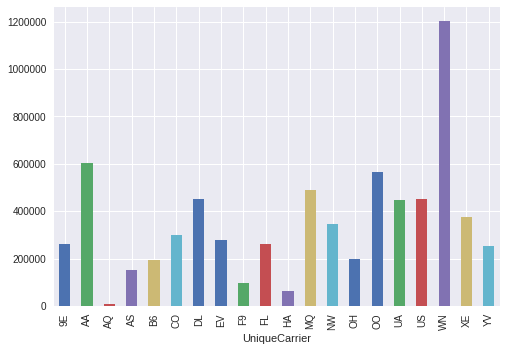

In [9]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [10]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [12]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

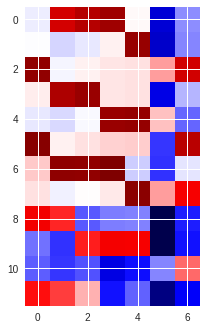

In [13]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

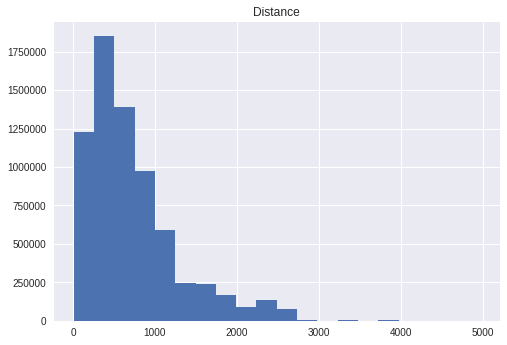

In [14]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [0]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [0]:
num_flights_by_date = flights_df.groupby('Date').size()

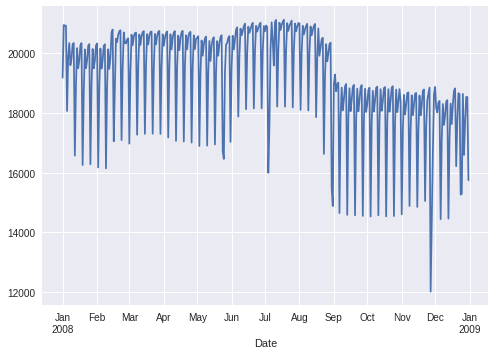

In [17]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

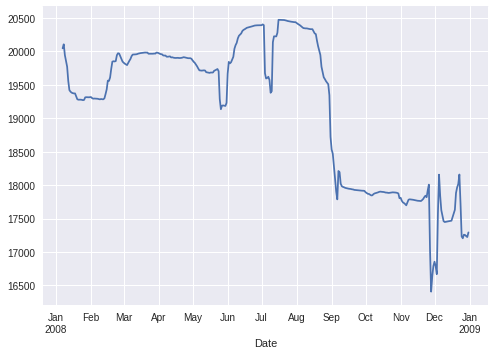

In [18]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- ***EV*** 

In [23]:
# You code here
flights_df.groupby('UniqueCarrier')['FlightNum'].count().sort_values(ascending=False).iloc[:10]

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: FlightNum, dtype: int64

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- ***weather conditions ***
- National Air System
- security reasons

In [9]:
# You code here
flights_df.groupby('CancellationCode')['CancellationCode'].count().sort_values(ascending=False)

CancellationCode
B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - ***San-Francisco – Los-Angeles*** 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [10]:
# You code here
pd.crosstab(flights_df.Origin, flights_df.Dest)

Dest,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
Origin,,,,,,,,,,,,,,,,,,,,,
ABE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
flight_freq = flights_df.groupby(['Origin', 'Dest'])['FlightNum'].count()#.max()

In [20]:
type(flight_freq)

pandas.core.series.Series

In [21]:
flight_freq.idxmax()

('SFO', 'LAX')

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- ***668*** 

### This didn't work :(

In [8]:
flights_df['WeatherDelay'].unique()

array([      nan, 0.000e+00, 2.400e+01, 1.200e+01, 2.200e+01, 7.000e+00,
       2.500e+01, 1.350e+02, 3.000e+00, 1.000e+00, 1.100e+01, 4.000e+00,
       1.300e+01, 5.000e+00, 8.100e+01, 7.800e+01, 7.200e+01, 2.100e+01,
       8.000e+00, 3.700e+01, 5.500e+01, 1.570e+02, 2.000e+00, 2.020e+02,
       2.600e+01, 6.800e+01, 2.300e+01, 4.800e+01, 3.200e+01, 4.600e+01,
       3.300e+01, 6.000e+01, 5.400e+01, 1.890e+02, 1.980e+02, 1.000e+01,
       3.800e+01, 7.000e+01, 1.160e+02, 3.100e+01, 6.000e+00, 1.800e+01,
       7.700e+01, 1.200e+02, 6.300e+01, 1.170e+02, 5.000e+01, 1.600e+01,
       1.700e+01, 3.000e+01, 8.500e+01, 4.300e+01, 9.300e+01, 1.500e+02,
       1.490e+02, 4.000e+01, 7.600e+01, 2.000e+01, 1.180e+02, 3.500e+01,
       6.600e+01, 5.200e+01, 1.130e+02, 1.500e+01, 5.300e+01, 4.200e+01,
       7.100e+01, 3.600e+01, 7.500e+01, 1.400e+01, 2.220e+02, 1.420e+02,
       6.500e+01, 9.700e+01, 2.330e+02, 2.900e+01, 8.000e+01, 5.600e+01,
       6.400e+01, 3.400e+01, 5.800e+01, 8.700e+01, 

In [0]:
# You code here
flights_delay_freq = flights_df.loc[flights_df['CancellationCode'] == 'B'].groupby(['Origin', 'Dest', 'CancellationCode'])['DepDelay'].count()

In [8]:
flights_delay_freq.idxmax()

('DEN', 'ASE', 'B')

In [33]:
flights_delay_freq.describe()

count    10059.000000
mean         0.118103
std          0.491698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.000000
Name: DepDelay, dtype: float64

In [34]:
type(flights_delay_freq)

pandas.core.series.Series

In [0]:
flight_delay_df = pd.DataFrame({'count' : flights_df.loc[(flights_df['WeatherDelay'] > 0) & (flights_df['DepDelay'] > 0)].groupby(['Origin', 'Dest'])['DepDelay'].count()}).reset_index()

In [24]:
flight_delay_df

,Origin,Dest,count
0,ABE,ATL,22
1,ABE,CLE,4
2,ABE,CLT,1
3,ABE,CVG,1
4,ABE,DTW,6
5,ABE,LGA,3
6,ABE,ORD,18
7,ABI,DFW,31
8,ABQ,AMA,2
9,ABQ,ATL,2


In [25]:
flight_delay_df.sort_values(by='count', ascending=False).iloc[:5]

,Origin,Dest,count
1389,DTW,LGA,435
3176,ORD,DFW,418
3169,ORD,CVG,383
3230,ORD,MSP,371
1407,DTW,ORD,370


In [0]:
flight_delay_top_5 = flight_delay_df.sort_values(by='count', ascending=False).iloc[:5]

In [14]:
flight_delay_top_5['count'].sum()

1977

### Let's break this problem down

#### First, let's find top 5 delayed routes

In [0]:
#delayed_routes = flights_df.groupby(['Origin', 'Dest'])['DepDelay']#.filter(lambda x: x['DepDelay'] > 0)

In [0]:
flight_delay_df = pd.DataFrame({'count' : flights_df.loc[(flights_df['DepDelay'] > 0)].groupby(['Origin', 'Dest'])['DepDelay'].count()}).reset_index()

In [0]:
delayed_routes_top5 = flight_delay_df.sort_values(by='count', ascending=False).iloc[:5]

In [10]:
delayed_routes_top5

,Origin,Dest,count
2722,LAX,SFO,6253
1179,DAL,HOU,5742
4636,SFO,LAX,5322
3775,ORD,LGA,5311
2080,HOU,DAL,5288


#### Making sure everything looks okay till now

In [11]:
delayed_routes_top5.columns

Index(['Origin', 'Dest', 'count'], dtype='object')

In [12]:
pd.DataFrame({'count' : flights_df.groupby(['Origin', 'Dest'])['DepDelay'].count()}).reset_index().sort_values(by='count', ascending=False).iloc[:5]

,Origin,Dest,count
4746,SFO,LAX,13299
2786,LAX,SFO,12935
3682,OGG,HNL,12138
2117,HNL,OGG,11779
2753,LAX,LAS,11562


#### Get all flights between these routes

In [0]:
# flights_delayed_filtered = flights_df.loc((flights_df['Origin'] == delayed_routes_top5['Origin']) & (flights_df['Dest'] == delayed_routes_top5['Dest']))

In [0]:
# flights_df.loc((flights_df['Origin'].isin(delayed_routes_top5['Origin'])))

In [0]:
keys = list(['Origin', 'Dest'])
i1 = flights_df.set_index(keys).index
i2 = delayed_routes_top5.set_index(keys).index

In [0]:
flights_delayed_filtered = flights_df[i1.isin(i2)]

In [21]:
flights_delayed_filtered

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
398,2008,1,3,4,708.0,WN,457,-6.0,-2.0,LAX,SFO,337,0,NaN,NaN,NaN,NaN,NaN,NaN
399,2008,1,3,4,NaN,WN,469,NaN,NaN,LAX,SFO,337,1,A,NaN,NaN,NaN,NaN,NaN
400,2008,1,3,4,2320.0,WN,593,203.0,206.0,LAX,SFO,337,0,NaN,0.0,0.0,203.0,0.0,0.0
401,2008,1,3,4,NaN,WN,618,NaN,NaN,LAX,SFO,337,1,C,NaN,NaN,NaN,NaN,NaN
402,2008,1,3,4,2008.0,WN,646,129.0,123.0,LAX,SFO,337,0,NaN,0.0,24.0,6.0,0.0,99.0
403,2008,1,3,4,1625.0,WN,656,118.0,115.0,LAX,SFO,337,0,NaN,0.0,0.0,5.0,0.0,113.0
404,2008,1,3,4,1305.0,WN,680,131.0,135.0,LAX,SFO,337,0,NaN,0.0,0.0,131.0,0.0,0.0
405,2008,1,3,4,1558.0,WN,776,184.0,193.0,LAX,SFO,337,0,NaN,184.0,0.0,0.0,0.0,0.0
1896,2008,1,3,4,1800.0,WN,442,-1.0,-5.0,SFO,LAX,337,0,NaN,NaN,NaN,NaN,NaN,NaN
1897,2008,1,3,4,852.0,WN,475,-16.0,2.0,SFO,LAX,337,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
flights_delayed_filtered['Origin'].unique()

array(['LAX', 'SFO', 'DAL', 'HOU', 'ORD'], dtype=object)

In [25]:
flights_delayed_filtered.groupby(['Origin', 'Dest'])['DepDelay'].count()

Origin  Dest
DAL     HOU      9350
HOU     DAL      9259
LAX     SFO     12935
ORD     LGA      9948
SFO     LAX     13299
Name: DepDelay, dtype: int64

In [0]:
flights_delayed_filtered = pd.DataFrame({'count' : flights_delayed_filtered.loc[(flights_delayed_filtered['WeatherDelay'] > 0)].groupby(['Origin', 'Dest'])['WeatherDelay'].count()}).reset_index()

In [29]:
flights_delayed_filtered['count'].sum()

668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - ***Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).***
 - Flights are uniformly distributed within time interval [0-23].
 - ***In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.***

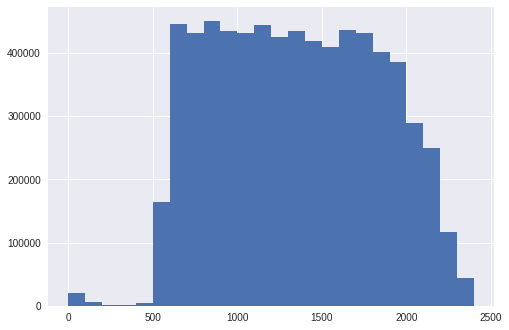

In [6]:
# You code here
flights_df['DepTime'].hist(bins=24)

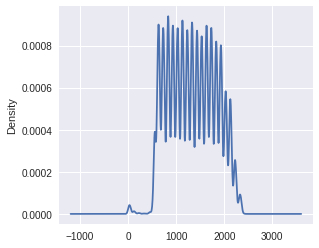

In [30]:
flights_df['DepTime'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

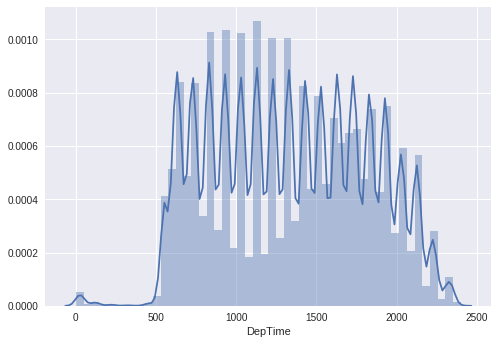

In [32]:
sns.distplot(flights_df['DepTime'].dropna())

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- ***The number of flights during weekends is less than during weekdays (working days).***
- The lowest number of flights is on Sunday.
- ***There are less flights during winter than during summer.***  

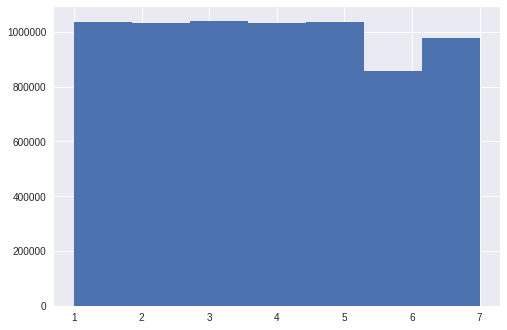

In [6]:
# You code here
flights_df['DayOfWeek'].hist(bins=7)

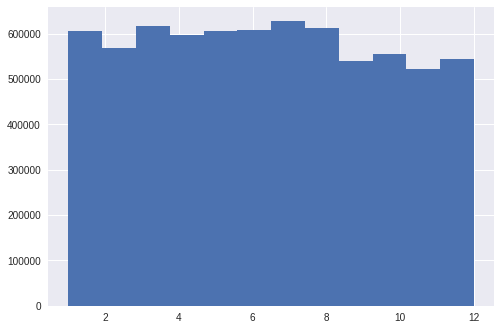

In [7]:
flights_df['Month'].hist(bins=12)

In [0]:
winter_months = [12,1,2]
summer_months = [6,7,8]

flights_in_winter = flights_df.loc[flights_df['Month'].isin(winter_months)]['FlightNum'].count()
flights_in_summer = flights_df.loc[flights_df['Month'].isin(summer_months)]['FlightNum'].count()

In [11]:
print(flights_in_winter)
print(flights_in_summer)

1719959
1848875


**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- ***December has the highest rate of cancellations due to weather. ***
- The highest rate of cancellations in September is due to Security reasons.
- ***April's top cancellation reason is carriers.***
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [0]:
# You code here
flights_df['CancellationCode'].plot()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


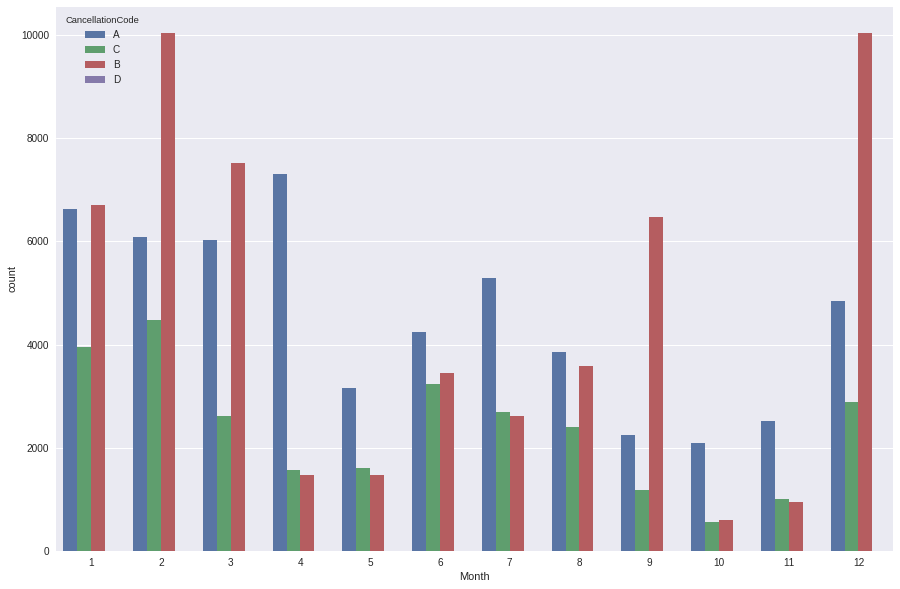

In [14]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
sns.countplot(x='Month', hue='CancellationCode', data=flights_df, ax=ax);

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- ***April*** 

In [0]:
# You code here

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- ***AA***

In [24]:
# You code here
flights_df.loc[(flights_df['Month'] == 4) & (flights_df['CancellationCode'] == 'A')].groupby('UniqueCarrier')['UniqueCarrier'].count().sort_values(ascending=False)

UniqueCarrier
AA    3696
WN     533
UA     494
YV     454
9E     391
US     335
OO     298
MQ     283
DL     226
AS     135
NW     122
FL      81
OH      76
CO      50
B6      43
XE      30
EV      29
HA      29
F9       7
Name: UniqueCarrier, dtype: int64

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- ***AQ*** 

In [0]:
delayed_flights_df = flights_df.loc[(flights_df['ArrDelay'] > 0.0) & (flights_df['DepDelay'] > 0.0)]

In [12]:
delayed_flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,JAX,688,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,LAS,1591,0,NaN,10.0,0.0,0.0,0.0,47.0


In [0]:
# You code here
sns.boxplot(x="UniqueCarrier", y="ArrDelay", hue="ArrDelay",
            data=delayed_flights_df, linewidth=2.5)

In [0]:
sns.boxplot(x="UniqueCarrier", y="DepDelay", hue="DepDelay",
            data=delayed_flights_df, linewidth=2.5)

In [7]:
delayed_flights_df.groupby('UniqueCarrier')['ArrDelay'].count().sort_values(ascending=False)

UniqueCarrier
WN    397163
AA    200110
MQ    148130
UA    145692
OO    144774
DL    125646
XE    110189
CO    104337
US    103781
NW     89156
EV     85757
FL     76831
YV     68894
9E     54834
B6     54439
OH     52143
AS     41835
F9     32999
HA     11263
AQ      1027
Name: ArrDelay, dtype: int64

In [8]:
delayed_flights_df.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].apply(np.median).sort_values()

UniqueCarrier
AQ     9.5
HA    10.0
F9    14.0
WN    17.0
AS    20.0
US    20.0
DL    20.0
CO    21.0
NW    21.0
FL    22.0
OO    23.0
9E    26.0
EV    26.0
MQ    26.0
XE    27.0
AA    27.0
UA    28.0
OH    31.0
YV    32.0
B6    33.0
dtype: float64